In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [75]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [76]:
sales_of_company_x = pd.read_csv("C:/Users/yullH/bp/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("C:/Users/yullH/bp/monthly-boston-armed-robberies-j.csv")
mean_monthly_temp = pd.read_csv("C:/Users/yullH/bp/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("C:/Users/yullH/bp/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("C:/Users/yullH/bp/daily-total-female-births-in-cal.csv")

In [77]:
one_part_series = {
     "Daily total female births in California": female_births["Count"],
     "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"]
}

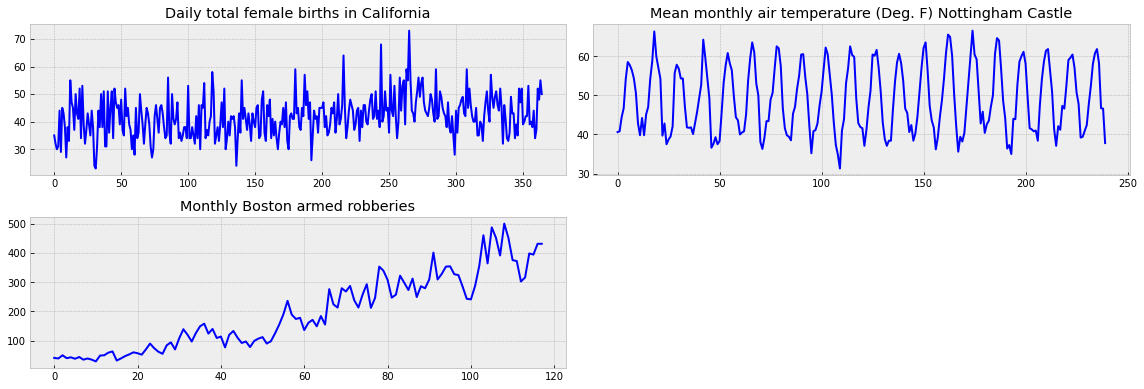

In [78]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(one_part_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        one_part_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Проанализируйте ряд “Daily total female births in California”
Сделайте вывод о его стационарности / нестационарности
Если временной ряд не стационарен, выполните шаги, необходимые для его преобразования в стационарный
Подтвердите стационарность полученного временного ряда

# Ряд изначально похож на стационарный, проверим его с помощью теста Дики-Фуллера
# p - value меньше 0,05, - ряд стационарен

In [79]:
test_stationarity(one_part_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


# Проанализируйте ряд “Mean monthly air temperature”
Сделайте вывод о его стационарности / нестационарности.
Если временной ряд не стационарен, выполните шаги, необходимые для его преобразования в стационарный
Подтвердите стационарность полученного временного ряда

# Ряд изначально похож на стационарный, проверим его с помощью теста Дики-Фуллера 
# p - value меньше 0,05, - ряд стационарен 

In [80]:
test_stationarity(one_part_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


# Проанализируйте ряд “Monthly Boston armed robberies”


## Ряд изначально не похож на стационарный, видим тренд проверим его с помощью теста Дики-Фуллера
# p - value больше 0,05, - ряд не стационарен

In [81]:
test_stationarity(one_part_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


# проведём необходимые итерации для приведения ряда к стационарному виду

Нормализуем дисперсию

In [82]:
series = boxcox(one_part_series["Monthly Boston armed robberies"], 0)

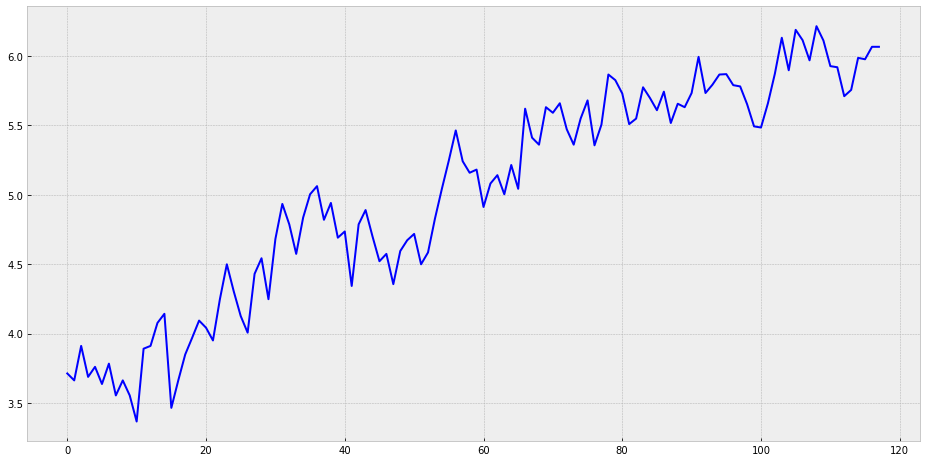

In [83]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [84]:
series = np.diff(series, 1)

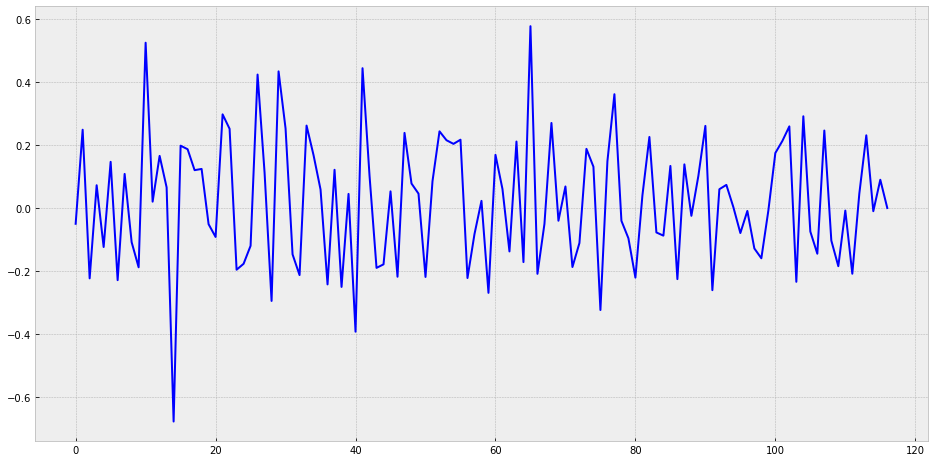

In [85]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [86]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


# Ряд приведен к стационарному виду на первом шаге дифференцирования

In [87]:
two_part_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]
}

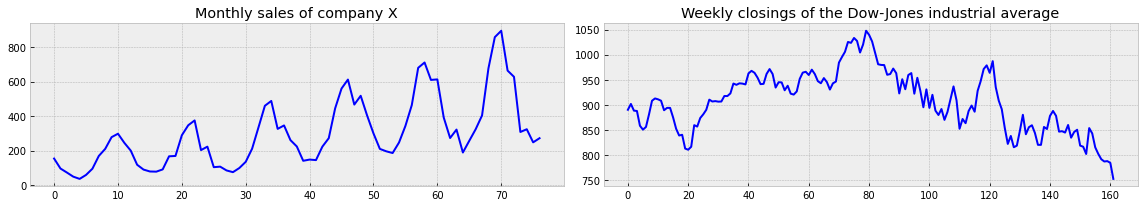

In [88]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(two_part_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        two_part_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Проанализируйте ряд “Monthly sales of company X”


## Ряд изначально не похож на стационарный, видим тренд проверим его с помощью теста Дики-Фуллера
# p - value больше 0,05, - ряд не стационарен

In [89]:
test_stationarity(two_part_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


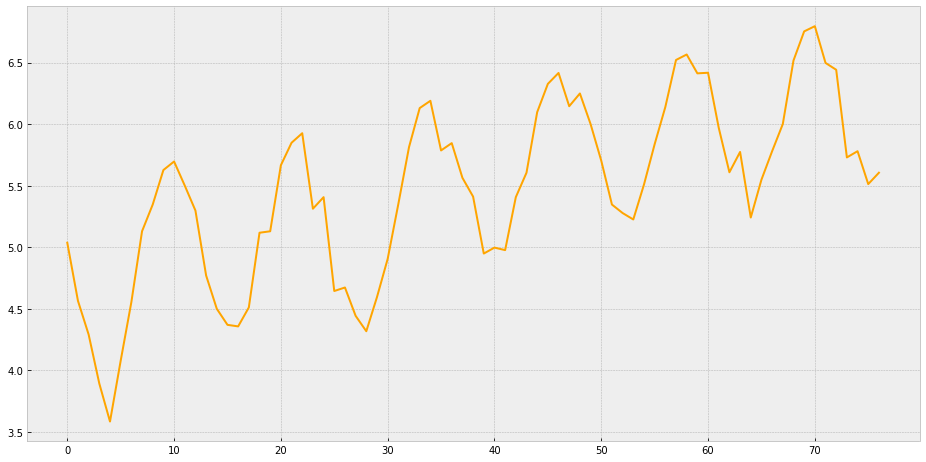

In [90]:
#нормализуем дисперсию
sales = boxcox(two_part_series["Monthly sales of company X"], 0)
#построим график
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(sales, color='orange')

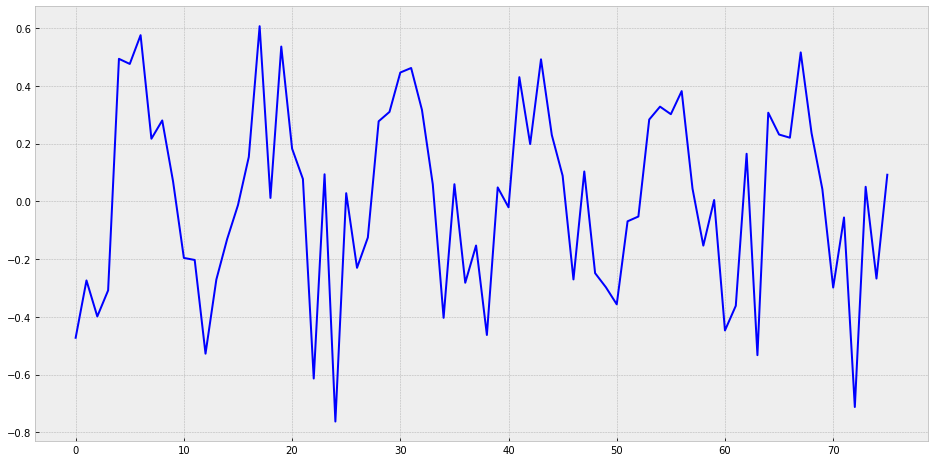

In [91]:
#дифференцируем
sales = np.diff(sales, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(sales, color='blue')

In [92]:
test_stationarity(sales)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


# Ряд приведен к стационарному виду на первом шаге дифференцирования

# Проанализируйте ряд “Weekly closings of the Dow-Jones”
Ряд изначально не похож на стационарный, проверим его с помощью теста Дики-Фуллера¶
p - value больше 0,05, - ряд не стационарен

In [93]:
test_stationarity(two_part_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


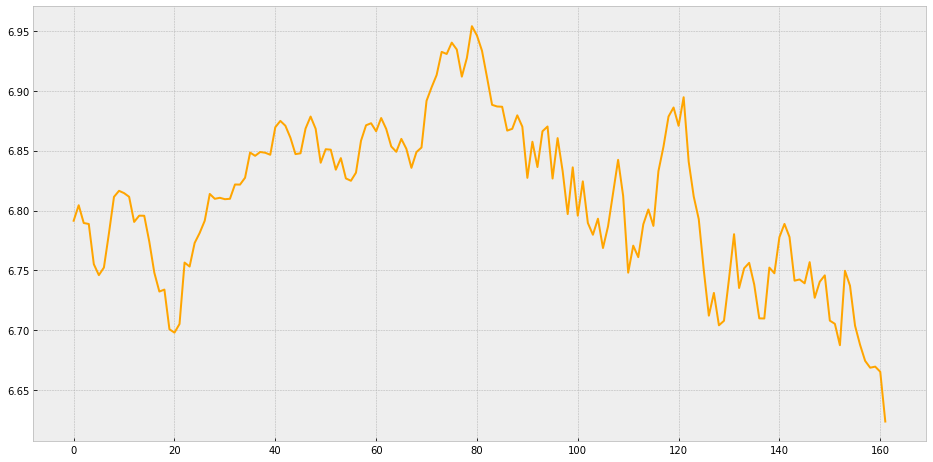

In [94]:
#нормализуем дисперсию
dow_jones = boxcox(two_part_series["Weekly closings of the Dow-Jones industrial average"], 0)
#построим график
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(dow_jones, color='orange')

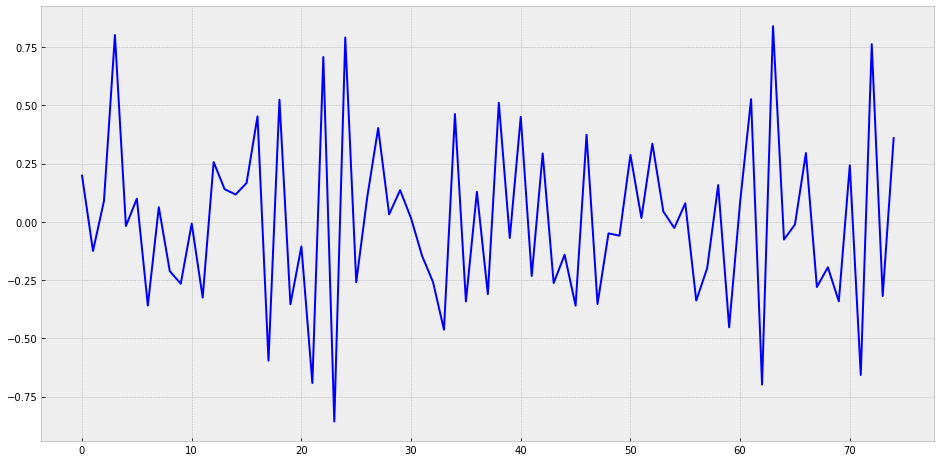

In [95]:
#дифференцируем
dow_jones = np.diff(sales, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(dow_jones, color='blue')

In [96]:
test_stationarity(dow_jones)

Results of Dickey-Fuller Test:
Test Statistic                -7.101182e+00
p-value                        4.164137e-10
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


Ряд приведен к стационарному виду на первом шаге дифференцирования